# Self response absolute

$$ r_{i} (t,\tau) = \log m_{i}(t + \tau) - \log m_{i}(t) = \log \frac{m_{i}(t + \tau)}{m_{i}(t)} $$
$$ R_{ii}^{(exc. 0)}(\tau) = \left \langle \vert r_i(t,\tau) \vert  \right \rangle_t^{(exc. 0)} $$

In [2]:
# Import modules

from matplotlib import pyplot as plt
import numpy as np
import pickle

%matplotlib inline

In [4]:
# Using the AAPL stock
ticker_i = 'AAPL'
days = ['07', '08', '09', '10', '11']
tau_val = 1000
t_step = 100

In [9]:
def self_response_abs_plot(ticker, days, tau_val, t_step):
    plt.figure(figsize=(9,16))
    plt.subplots_adjust(hspace = 0, wspace = 0)

    for i, day in enumerate(days):

        plot = pickle.load(open('../Data/self_response_abs_data_{}ms/self_abs_201603{}_{}i_{}ms.pickl'
                                .format(t_step, day, ticker, t_step), 'rb'))

        plt.subplot(5,1,i+1)
        plt.semilogx(plot, '-g', label='Stock i %s - %s' % (ticker_i, day))
        plt.xlabel(r'Time lag $[\tau]$')
        plt.ylabel(r'Self response $ R_{ii} (\tau) $')
        plt.legend(loc='best')
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        plt.grid(True)
        plt.tight_layout()

    #plt.savefig('self_response_abs_201603{}_{}.png'.format(day, ticker))

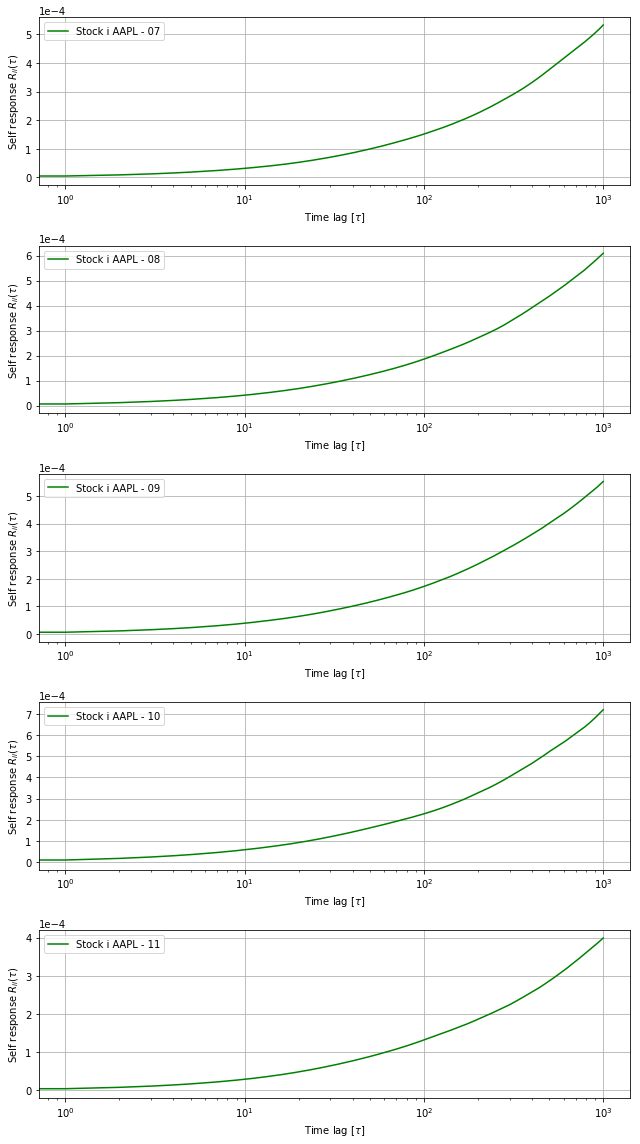

In [10]:
self_response_abs_plot(ticker_i, days, tau_val, t_step)